# IMPORT LIBRARIES

In [114]:
import pandas as pd
import random
from pyomo.environ import *
import numpy as np
import time
import matplotlib.pyplot as plt


# IMPORT DATA

In [115]:
df = pd.read_csv(r'C:\Users\Matteo.Gabellini\OneDrive - Alma Mater Studiorum Università di Bologna\DOTTORATO\1.RICERCA\0.CONFERENCE PAPER\6.ICIL\1.WAREHOUSE ALLOCATION\0.DATA\DatasetClean.csv')
df['Articolo'] = df['Articolo'].astype(str)
df

,Unnamed: 0,Num. Ordine,Mese-Giorno,Articolo,Descrizione,Pezzi ordinati,Pezzi evasi,Pz x CT,Pz x TH,Volume pezzo,Volume cartone,Ecr1,Ecr2,Ecr3,Ecr4,Canale,Cliente,PV,Percorso
0,0,738378,04-18,20918,CAREFREE COTTON SALVASLIP 44 PZ.DISTESO,6,6,24,0,1.288000,33.96900,Cura Persona,Igienico Sanitari,Assorbenti,Salvaslip e Proteggislip,Piume Diretti,2104490,SM,26
1,1,738379,04-18,3456,STUDIO L.5 INVISI FIX GEL FOR.LIQ.150ml,6,6,6,0,0.378000,2.66000,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26
2,2,738379,04-18,7199,STUDIO L.8 FIX&FORCE GEL IPERFOR.150 ML.,6,6,6,0,0.303750,2.94400,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26
3,3,738379,04-18,43556,STUDIO L.9 INDESTRUC.GEL ESTREMO 150 ML,6,6,6,0,0.720000,2.81600,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26
4,4,738379,04-18,50045,STUDIO L.5 INVISI FIX GEL CR.FOR.VAS.150,6,6,6,0,0.405000,2.54375,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447292,2447292,791134,12-29,92720,CHANTECLAIR SGRASS.600 MLx2 PZ.LIMONE,1,1,6,0,3.271125,23.04000,Casa e Bucato,Superfici,Detergenti Superfici,Sgrassatori,B2C,2152842,UD,999
2447293,2447293,791134,12-29,98819,VIM GEL BAGNO 5in1 ANTICALCARE 1000 ML,1,1,12,0,1.559250,25.63600,Casa e Bucato,Bagno,Detergenti Bagno e WC,Detergenti Bagno,B2C,2152842,UD,999
2447294,2447294,791134,12-29,105877,CIF CREMA GREEN ACTIVE 500 ML PINK BLOOM,1,1,16,0,0.728000,17.02400,Casa e Bucato,Superfici,Detergenti Superfici,Detergenti Multiuso,B2C,2152842,UD,999
2447295,2447295,791134,12-29,107171,OMINO B.DET.IDROCAPS SALVAFIBRE 20pz,1,1,8,0,2.025000,20.46000,Casa e Bucato,Bucato,Detersivi Bucato,Detersivi Capsule Lavatrice,B2C,2152842,UD,999


In [116]:
df_vol = df.groupby('Articolo')[['Volume pezzo']].median().reset_index()
df_vol

,Articolo,Volume pezzo
0,100002,0.060000
1,100003,0.060000
2,100004,0.060000
3,100005,0.060000
4,100006,0.060000
...,...,...
18655,99972,0.059375
18656,99973,0.270000
18657,99974,3.312000
18658,99975,0.084000


In [117]:
df_stock = pd.read_excel(r'C:\Users\Matteo.Gabellini\OneDrive - Alma Mater Studiorum Università di Bologna\DOTTORATO\1.RICERCA\0.CONFERENCE PAPER\6.ICIL\1.WAREHOUSE ALLOCATION\0.DATA\Giacenza media articoli 2024.xlsx')
df_stock['ARTICOLO'] = df_stock['ARTICOLO'].astype(str)
df_stock = df_stock.groupby('ARTICOLO')[['GIACENZA MEDIA']].mean().reset_index()
df_stock

,ARTICOLO,GIACENZA MEDIA
0,100002,1057.6
1,100003,735.4
2,100004,1072.4
3,100005,1170.0
4,100006,1232.2
...,...,...
20919,99972,19.2
20920,99973,26.5
20921,99974,13.9
20922,99975,7.0


In [118]:
# Perform the join based on 'Articolo'
df_stock_vol = df_stock.merge(df_vol[['Articolo','Volume pezzo']], how='left', left_on='ARTICOLO', right_on='Articolo')

# Drop duplicate column 'ARTICOLO' after merge
df_stock_vol.drop(columns=['Articolo'], inplace=True)

#Compute stock in volum
df_stock_vol['Volume pezzo [m3]'] = df_stock_vol['Volume pezzo'] / 1000
df_stock_vol['Giacenza Pezzi Volume [m3]'] = df_stock_vol['GIACENZA MEDIA'] * df_stock_vol['Volume pezzo [m3]']

#df_stock_vol = df_stock_vol.drop_duplicates()

df_stock_vol

,ARTICOLO,GIACENZA MEDIA,Volume pezzo,Volume pezzo [m3],Giacenza Pezzi Volume [m3]
0,100002,1057.6,0.060000,0.000060,0.063456
1,100003,735.4,0.060000,0.000060,0.044124
2,100004,1072.4,0.060000,0.000060,0.064344
3,100005,1170.0,0.060000,0.000060,0.070200
4,100006,1232.2,0.060000,0.000060,0.073932
...,...,...,...,...,...
20919,99972,19.2,0.059375,0.000059,0.001140
20920,99973,26.5,0.270000,0.000270,0.007155
20921,99974,13.9,3.312000,0.003312,0.046037
20922,99975,7.0,0.084000,0.000084,0.000588


In [119]:
df_stock_vol['Giacenza Pezzi Volume [m3]'].sum()

9121.832503351417

In [120]:
# Perform a left join to maintain the original number of rows in df
df = df.merge(df_stock_vol[['ARTICOLO', 'Giacenza Pezzi Volume [m3]']], how='left', left_on='Articolo', right_on='ARTICOLO')

df['Volume evaso [m3]'] = df['Pezzi evasi'] * df['Volume pezzo'] / 1000

# Drop the extra 'ARTICOLO' column from df_stock_vol (after the merge)
df.drop(columns=['ARTICOLO'], inplace=True)

# Ensure no additional duplicates were introduced
#df = df.drop_duplicates()

df

,Unnamed: 0,Num. Ordine,Mese-Giorno,Articolo,Descrizione,Pezzi ordinati,Pezzi evasi,Pz x CT,Pz x TH,Volume pezzo,Volume cartone,Ecr1,Ecr2,Ecr3,Ecr4,Canale,Cliente,PV,Percorso,Giacenza Pezzi Volume [m3],Volume evaso [m3]
0,0,738378,04-18,20918,CAREFREE COTTON SALVASLIP 44 PZ.DISTESO,6,6,24,0,1.288000,33.96900,Cura Persona,Igienico Sanitari,Assorbenti,Salvaslip e Proteggislip,Piume Diretti,2104490,SM,26,3.474766,0.007728
1,1,738379,04-18,3456,STUDIO L.5 INVISI FIX GEL FOR.LIQ.150ml,6,6,6,0,0.378000,2.66000,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26,0.206955,0.002268
2,2,738379,04-18,7199,STUDIO L.8 FIX&FORCE GEL IPERFOR.150 ML.,6,6,6,0,0.303750,2.94400,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26,0.140424,0.001823
3,3,738379,04-18,43556,STUDIO L.9 INDESTRUC.GEL ESTREMO 150 ML,6,6,6,0,0.720000,2.81600,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26,0.419256,0.004320
4,4,738379,04-18,50045,STUDIO L.5 INVISI FIX GEL CR.FOR.VAS.150,6,6,6,0,0.405000,2.54375,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26,0.148149,0.002430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447292,2447292,791134,12-29,92720,CHANTECLAIR SGRASS.600 MLx2 PZ.LIMONE,1,1,6,0,3.271125,23.04000,Casa e Bucato,Superfici,Detergenti Superfici,Sgrassatori,B2C,2152842,UD,999,2.330022,0.003271
2447293,2447293,791134,12-29,98819,VIM GEL BAGNO 5in1 ANTICALCARE 1000 ML,1,1,12,0,1.559250,25.63600,Casa e Bucato,Bagno,Detergenti Bagno e WC,Detergenti Bagno,B2C,2152842,UD,999,0.943970,0.001559
2447294,2447294,791134,12-29,105877,CIF CREMA GREEN ACTIVE 500 ML PINK BLOOM,1,1,16,0,0.728000,17.02400,Casa e Bucato,Superfici,Detergenti Superfici,Detergenti Multiuso,B2C,2152842,UD,999,0.743142,0.000728
2447295,2447295,791134,12-29,107171,OMINO B.DET.IDROCAPS SALVAFIBRE 20pz,1,1,8,0,2.025000,20.46000,Casa e Bucato,Bucato,Detersivi Bucato,Detersivi Capsule Lavatrice,B2C,2152842,UD,999,0.532170,0.002025


In [121]:
# assuming your DataFrame is called df_all (or df)
cols_to_check = ["Ecr1", "Ecr2", "Ecr3", "Ecr4"]
df = df.dropna(subset=cols_to_check, how="any").reset_index(drop=True)
df

,Unnamed: 0,Num. Ordine,Mese-Giorno,Articolo,Descrizione,Pezzi ordinati,Pezzi evasi,Pz x CT,Pz x TH,Volume pezzo,Volume cartone,Ecr1,Ecr2,Ecr3,Ecr4,Canale,Cliente,PV,Percorso,Giacenza Pezzi Volume [m3],Volume evaso [m3]
0,0,738378,04-18,20918,CAREFREE COTTON SALVASLIP 44 PZ.DISTESO,6,6,24,0,1.288000,33.96900,Cura Persona,Igienico Sanitari,Assorbenti,Salvaslip e Proteggislip,Piume Diretti,2104490,SM,26,3.474766,0.007728
1,1,738379,04-18,3456,STUDIO L.5 INVISI FIX GEL FOR.LIQ.150ml,6,6,6,0,0.378000,2.66000,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26,0.206955,0.002268
2,2,738379,04-18,7199,STUDIO L.8 FIX&FORCE GEL IPERFOR.150 ML.,6,6,6,0,0.303750,2.94400,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26,0.140424,0.001823
3,3,738379,04-18,43556,STUDIO L.9 INDESTRUC.GEL ESTREMO 150 ML,6,6,6,0,0.720000,2.81600,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26,0.419256,0.004320
4,4,738379,04-18,50045,STUDIO L.5 INVISI FIX GEL CR.FOR.VAS.150,6,6,6,0,0.405000,2.54375,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26,0.148149,0.002430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298719,2447292,791134,12-29,92720,CHANTECLAIR SGRASS.600 MLx2 PZ.LIMONE,1,1,6,0,3.271125,23.04000,Casa e Bucato,Superfici,Detergenti Superfici,Sgrassatori,B2C,2152842,UD,999,2.330022,0.003271
2298720,2447293,791134,12-29,98819,VIM GEL BAGNO 5in1 ANTICALCARE 1000 ML,1,1,12,0,1.559250,25.63600,Casa e Bucato,Bagno,Detergenti Bagno e WC,Detergenti Bagno,B2C,2152842,UD,999,0.943970,0.001559
2298721,2447294,791134,12-29,105877,CIF CREMA GREEN ACTIVE 500 ML PINK BLOOM,1,1,16,0,0.728000,17.02400,Casa e Bucato,Superfici,Detergenti Superfici,Detergenti Multiuso,B2C,2152842,UD,999,0.743142,0.000728
2298722,2447295,791134,12-29,107171,OMINO B.DET.IDROCAPS SALVAFIBRE 20pz,1,1,8,0,2.025000,20.46000,Casa e Bucato,Bucato,Detersivi Bucato,Detersivi Capsule Lavatrice,B2C,2152842,UD,999,0.532170,0.002025


In [122]:
df.drop_duplicates(subset = 'Articolo').groupby('Ecr2')['Giacenza Pezzi Volume [m3]'].sum().sum()

6840.649135358259

# DEFINE FUNCTIONS

In [123]:
def initial_solution(gene_space, num_genes):
    """Generate a random initial solution (1D array of length num_genes)."""
    return np.random.choice(gene_space, size=num_genes)

In [124]:
gene_space = [0,1]
num_genes = len(df['Ecr2'].dropna().unique())
individual =  initial_solution(gene_space, num_genes)
individual

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [125]:
def propose_neighbor(solution, gene_space, max_flips=2):
    """
    Propose a neighbor by flipping 1..`max_flips` random gene(s).
    If genes are binary {0,1}, flipping toggles the assignment.
    Otherwise, resample a different value from gene_space.
    """
    neighbor = solution.copy()
    n = len(neighbor)
    k = 1 if max_flips <= 1 else np.random.randint(1, max_flips + 1)
    flip_indices = np.random.choice(n, size=k, replace=False)
    for idx in flip_indices:
        curr = neighbor[idx]
        if set(gene_space) == {0, 1}:
            neighbor[idx] = 1 - curr
        else:
            choices = [g for g in gene_space if g != curr]
            neighbor[idx] = random.choice(choices)
    return neighbor

In [126]:
solution = individual.copy()     # population is a 1D array here
neighbor = propose_neighbor(individual, gene_space, max_flips=2)
neighbor

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [127]:
def compute_fitness_unfitness_single(individual,
                                     df,
                                     stock,
                                     capacity_A,
                                     capacity_B,
                                     penalty_factor,
                                     fitness_type='BASE'):
    """
    Fitness (to MINIMIZE):
        fitness = 1 - (#AB_routes / #total_routes)
    Unfitness:
        capacity penalty as before.
    """
    unique_categories = df['Ecr2'].dropna().unique()
    df_allocation = pd.DataFrame({'Ecr2': unique_categories, 'Warehouse': individual})
    df_merged = pd.merge(df, df_allocation, on='Ecr2', how='left')
    df_merged['Warehouse'] = df_merged['Warehouse'].replace({0: 'A', 1: 'B'})

    if fitness_type == 'BASE':
        route_sets = (
            df_merged
            .groupby(['Mese-Giorno', 'Percorso'])['Warehouse']
            .apply(lambda x: set(x.unique()))
            .reset_index(name='WarehouseSet')
        )
        total_routes = len(route_sets)
        ab_routes = int(route_sets['WarehouseSet'].apply(lambda s: ('A' in s) and ('B' in s)).sum())
        pct_ab = (ab_routes / total_routes) if total_routes > 0 else 0.0

        individual_fitness = 1.0 - pct_ab
    else:
        individual_fitness = 0.0

    # Unfitness (capacity penalty) unchanged
    total_A = np.sum(individual * stock)
    total_B = np.sum((1 - individual) * stock)
    penalty = 0.0
    if total_A > capacity_A:
        penalty += penalty_factor * float(total_A - capacity_A)
    if total_B > capacity_B:
        penalty += penalty_factor * float(total_B - capacity_B)

    return float(individual_fitness), float(penalty)

In [128]:
# stock = np.ones(num_genes) 
stock = np.zeros(num_genes)
# capacity_A = 0 
# capacity_B = 0 
capacity_A = 999999999999999
capacity_B = 999999999999999
penalty_factor = 1

In [129]:
individual_fitness, penalty = compute_fitness_unfitness_single(individual,df,stock,capacity_A,capacity_B,penalty_factor,fitness_type='BASE')
individual_fitness, penalty

(0.15895610913404512, 0.0)

In [130]:
def energy_from(fitness, unfitness, weight_unfitness=1.0):
    """Scalar energy for SA (lower is better)."""
    return float(fitness) + weight_unfitness * float(unfitness)

In [131]:
energy = energy_from(individual_fitness, penalty, weight_unfitness=1.0)
energy

0.15895610913404512

In [132]:
def main_sa(gene_space,
            num_genes,
            sol_per_pop,  # kept for compatibility; ignored in SA
            df,
            stock,
            capacity_A,
            capacity_B,
            M,
            penalty_factor,
            T_init=1.0,
            T_min=1e-4,
            alpha=0.995,
            max_seconds=24*60*60,
            weight_unfitness=1.0,
            max_flips=2,
            seed=None,
            plot_every_seconds=None,   # ← set to a number (e.g., 60) to live-update plots
            live_tail=None             # ← optionally show only the last N points in live plots
            ):
    """
    Simulated Annealing optimizer for the warehouse allocation problem.

    Live plotting:
      - If plot_every_seconds is not None, two charts are refreshed every X seconds during the loop.
      - If live_tail is set (int), only the last N points are displayed.

    Stops when:
      - non_improving_iteration >= M, or
      - time exceeds max_seconds, or
      - temperature drops below T_min.

    Returns:
        best_solution (np.ndarray),
        best_fitness (float),
        best_unfitness (float),
        best_energy (float),
        computational_time (float),
        history (dict with curves)
    """
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)

    start_time = time.time()
    last_plot_time = start_time

    # History
    iterations = []
    best_fitness_history = []
    best_unfitness_history = []
    A_code_history = []
    B_code_history = []

    # Initial solution
    current = initial_solution(gene_space, num_genes)
    cur_fit, cur_unfit = compute_fitness_unfitness_single(current, df, stock, capacity_A, capacity_B, penalty_factor)
    cur_energy = energy_from(cur_fit, cur_unfit, weight_unfitness)

    best = current.copy()
    best_fit, best_unfit, best_energy = cur_fit, cur_unfit, cur_energy

    T = float(T_init)
    non_improving_iteration = 0
    iteration = 0

    while (T > T_min) and ((time.time() - start_time) < max_seconds) and (non_improving_iteration < M):
        iteration += 1

        neighbor = propose_neighbor(current, gene_space, max_flips=max_flips)
        n_fit, n_unfit = compute_fitness_unfitness_single(neighbor, df, stock, capacity_A, capacity_B, penalty_factor)
        n_energy = energy_from(n_fit, n_unfit, weight_unfitness)

        delta = n_energy - cur_energy
        accept = (delta <= 0) or (random.random() < np.exp(-delta / max(T, 1e-12)))

        if accept:
            current = neighbor
            cur_fit, cur_unfit, cur_energy = n_fit, n_unfit, n_energy
            if cur_energy < best_energy:
                best = current.copy()
                best_fit, best_unfit, best_energy = cur_fit, cur_unfit, cur_energy
                non_improving_iteration = 0
            else:
                non_improving_iteration += 1
        else:
            non_improving_iteration += 1

        # Geometric cooling
        T *= alpha

        # Track history (best-so-far)
        iterations.append(iteration)
        best_fitness_history.append(best_fit)
        best_unfitness_history.append(best_unfit)

        # Track A/B code counts for best solution
        unique_categories = df['Ecr2'].dropna().unique()
        df_alloc_best = pd.DataFrame({'Ecr2': unique_categories, 'Warehouse': best})
        df_merged_best = pd.merge(df, df_alloc_best, on='Ecr2', how='left')
        df_merged_best['Warehouse'] = df_merged_best['Warehouse'].replace({0: 'A', 1: 'B'})
        if 'Articolo' in df_merged_best.columns:
            A_code = df_merged_best[df_merged_best['Warehouse'] == 'A']['Articolo'].nunique()
            B_code = df_merged_best['Articolo'].nunique() - A_code
        else:
            A_code = 0
            B_code = 0
        A_code_history.append(A_code)
        B_code_history.append(B_code)

        # ---- Live plotting every X seconds ----
        if plot_every_seconds is not None and (time.time() - last_plot_time) >= plot_every_seconds:
            try:
                from IPython.display import clear_output, display
                clear_output(wait=True)
            except Exception:
                pass

            # tail slicing for clarity if requested
            if live_tail is not None and live_tail > 0:
                iters_plot = iterations[-live_tail:]
                fit_plot = best_fitness_history[-live_tail:]
                unfit_plot = best_unfitness_history[-live_tail:]
                A_plot = A_code_history[-live_tail:]
                B_plot = B_code_history[-live_tail:]
            else:
                iters_plot = iterations
                fit_plot = best_fitness_history
                unfit_plot = best_unfitness_history
                A_plot = A_code_history
                B_plot = B_code_history

            # Chart 1: Fitness & Unfitness (dual axis)
            fig, ax1 = plt.subplots(figsize=(10, 6))
            ax2 = ax1.twinx()
            ax1.plot(iters_plot, fit_plot, 'o-', label='Best Fitness')
            ax2.plot(iters_plot, unfit_plot, 'o-', label='Best Unfitness')
            ax1.set_xlabel('Iteration')
            ax1.set_ylabel('Best Fitness')
            ax2.set_ylabel('Best Unfitness')
            ax1.set_title("Simulated Annealing (LIVE): Best Fitness & Unfitness")
            ax1.grid(True)
            fig.tight_layout()
            plt.show()

            # Chart 2: Code A & Code B (dual axis)
            fig2, ax3 = plt.subplots(figsize=(10, 6))
            ax4 = ax3.twinx()
            ax3.plot(iters_plot, A_plot, 'o-', label='Code A')
            ax4.plot(iters_plot, B_plot, 'o-', label='Code B')
            ax3.set_xlabel('Iteration')
            ax3.set_ylabel('Code A')
            ax4.set_ylabel('Code B')
            ax3.set_title("Simulated Annealing (LIVE): Code A/B evolution")
            ax3.grid(True)
            fig2.tight_layout()
            plt.show()

            last_plot_time = time.time()
        # ---- end live plotting ----

    computational_time = time.time() - start_time

    # Final plots: fitness vs unfitness (dual axis), and code counts
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()
    ax1.plot(iterations, best_fitness_history, 'o-', label='Best Fitness')
    ax2.plot(iterations, best_unfitness_history, 'o-', label='Best Unfitness')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Best Fitness')
    ax2.set_ylabel('Best Unfitness')
    ax1.set_title("Simulated Annealing: Best Fitness & Unfitness")
    ax1.grid(True)
    fig.tight_layout()
    plt.show()

    fig2, ax3 = plt.subplots(figsize=(10, 6))
    ax4 = ax3.twinx()
    ax3.plot(iterations, A_code_history, 'o-', label='Code A')
    ax4.plot(iterations, B_code_history, 'o-', label='Code B')
    ax3.set_xlabel('Iteration')
    ax3.set_ylabel('Code A')
    ax4.set_ylabel('Code B')
    ax3.set_title("Simulated Annealing: Code A/B evolution")
    ax3.grid(True)
    fig2.tight_layout()
    plt.show()

    history = {
        'iterations': iterations,
        'best_fitness_history': best_fitness_history,
        'best_unfitness_history': best_unfitness_history,
        'A_code_history': A_code_history,
        'B_code_history': B_code_history
    }

    return best, best_fit, best_unfit, best_energy, computational_time, history

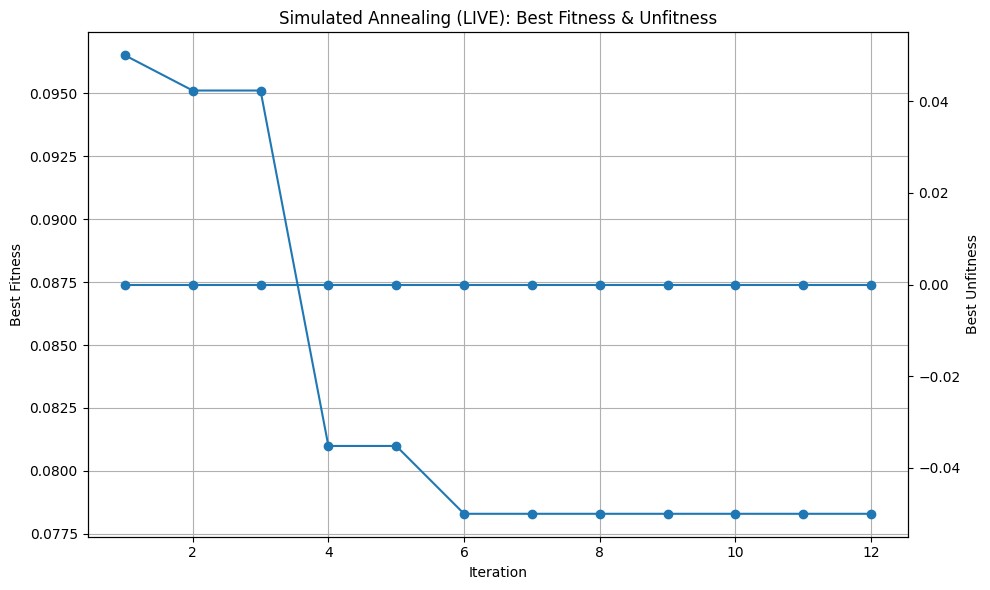

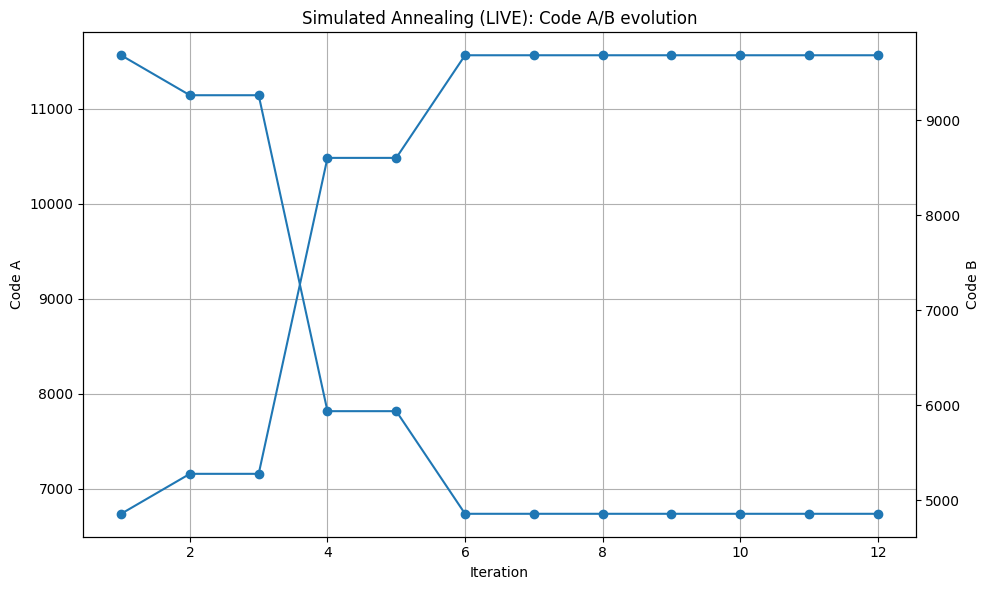

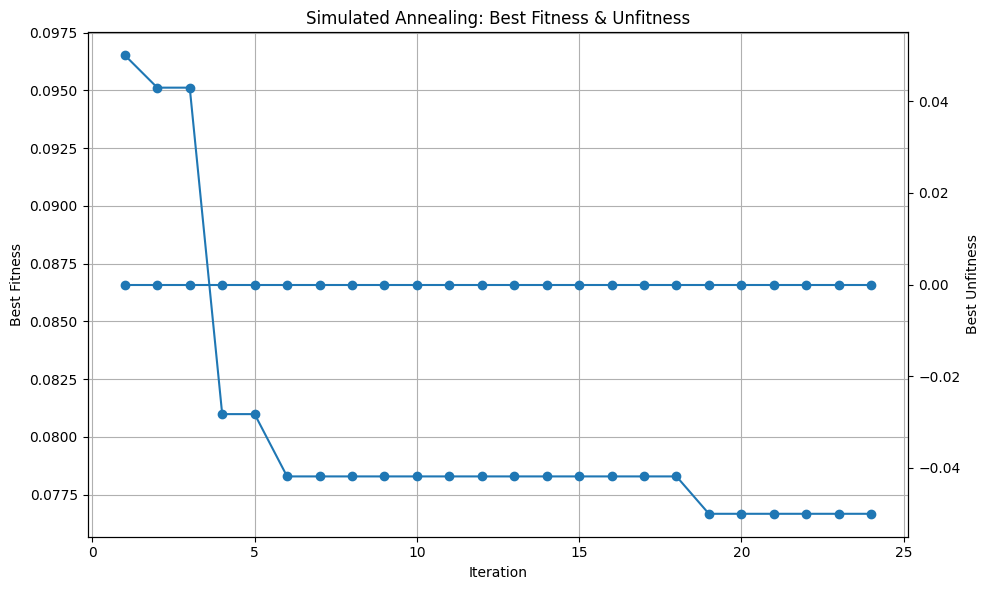

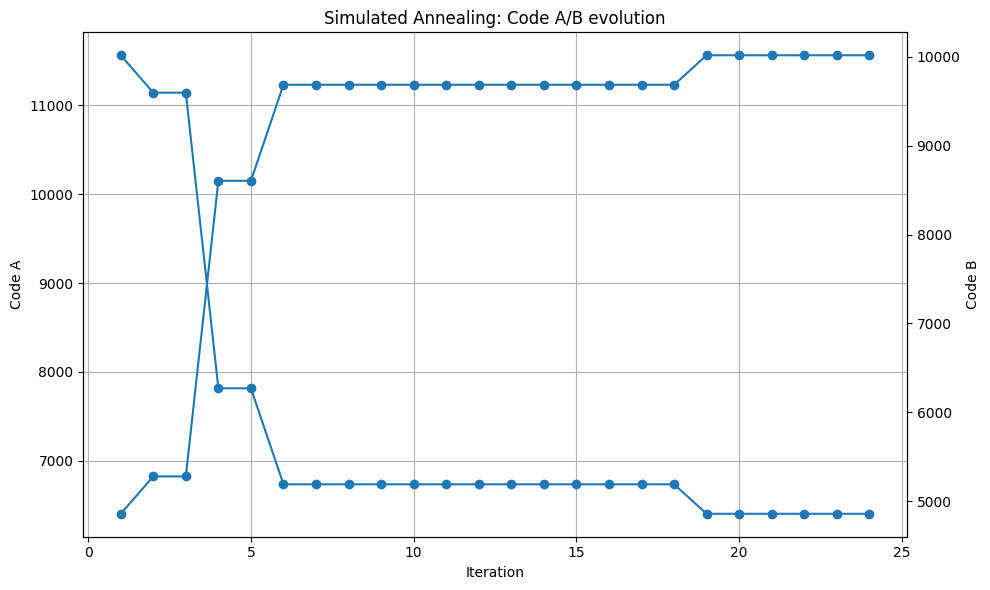

(array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]),
 0.07667421546425102,
 0.0,
 0.07667421546425102,
 121.45797967910767,
 {'iterations': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24],
  'best_fitness_history': [0.09651676911463392,
   0.09511484956324812,
   0.09511484956324812,
   0.08098781408389955,
   0.08098781408389955,
   0.07829181494661919,
   0.07829181494661919,
   0.07829181494661919,
   0.07829181494661919,
   0.07829181494661919,
   0.07829181494661919,
   0.07829181494661919,
   0.07829181494661919,
   0.07829181494661919,
   0.07829181494661919,
   0.07829181494661919,
   0.07829181494661919,
   0.07829181494661919,
   0.07667421546425102,
   0.07667421546425102,
   0.07667421546425102,
   0.07667421546425102,
   0.07667421546425102,
   0.07667421546425102],
  'best_unfitness_history': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   

In [133]:
# --------- Run Simulated Annealing ---------
# Assumes you have prepared: df, stock, capacity_A, capacity_B, M, penalty_factor

# Define gene space (binary 0/1 like the GA) and num_genes from your data
gene_space = [0, 1]
num_genes = len(df['Ecr2'].dropna().unique())
sol_per_pop = 1  # ignored by SA; kept for previous API compatibility

best, best_fit, best_unfit, best_energy, computational_time, history = main_sa(
            gene_space,
            num_genes,
            sol_per_pop,  # kept for compatibility; ignored in SA
            df,
            stock,
            capacity_A,
            capacity_B,
            M=1000,
            penalty_factor=1,
            T_init=1.0,
            T_min=1e-4,
            alpha=0.995,
            max_seconds=2*60,
            weight_unfitness=1.0,
            max_flips=2,
            seed=42,
            plot_every_seconds=60,   # ← set to a number (e.g., 60) to live-update plots
            live_tail=None             # ← optionally show only the last N points in live plots
)

best, best_fit, best_unfit, best_energy, computational_time, history

In [134]:
best

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

## ALLOCATION

In [135]:
df_allocation = pd.DataFrame({'Ecr2': df['Ecr2'].dropna().unique()})
df_allocation['Warehouse'] = best
df_allocation

,Ecr2,Warehouse
0,Igienico Sanitari,1
1,Capelli,1
2,Viso,1
3,Corpo,0
4,Trucchi,1
5,Cucina,0
6,Pet Care,0
7,Profumi,0
8,Giardino,1
9,Superfici,1


<Axes: xlabel='Ecr2'>

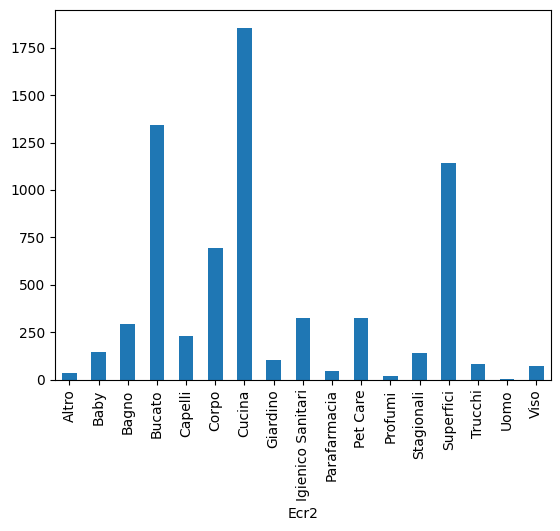

In [136]:
df.drop_duplicates(subset = 'Articolo').groupby('Ecr2')['Giacenza Pezzi Volume [m3]'].sum().plot.bar()

In [137]:
gene_space = [0,1]
num_genes = len(df['Ecr2'].dropna().unique())
penalty_factor = 1
M = 500000

stock = df.drop_duplicates(subset = 'Articolo').groupby('Ecr2')['Giacenza Pezzi Volume [m3]'].sum().values
# Define DC capacities (m3)
#capacity_A = 19800 * 0.37 #25000
#capacity_B =  12720 * 0.37 #6800

capacity_A = df.drop_duplicates(subset = 'Articolo').groupby('Ecr1')['Giacenza Pezzi Volume [m3]'].sum().sum()*0.65
capacity_B = df.drop_duplicates(subset = 'Articolo').groupby('Ecr1')['Giacenza Pezzi Volume [m3]'].sum().sum()*0.45

#stock = np.zeros(num_genes)
#capacity_A = 999999999999999
#capacity_B = 999999999999999

In [138]:
stock.sum(),capacity_A,capacity_B

(6840.649135358259, 4446.421937982867, 3078.292110911216)

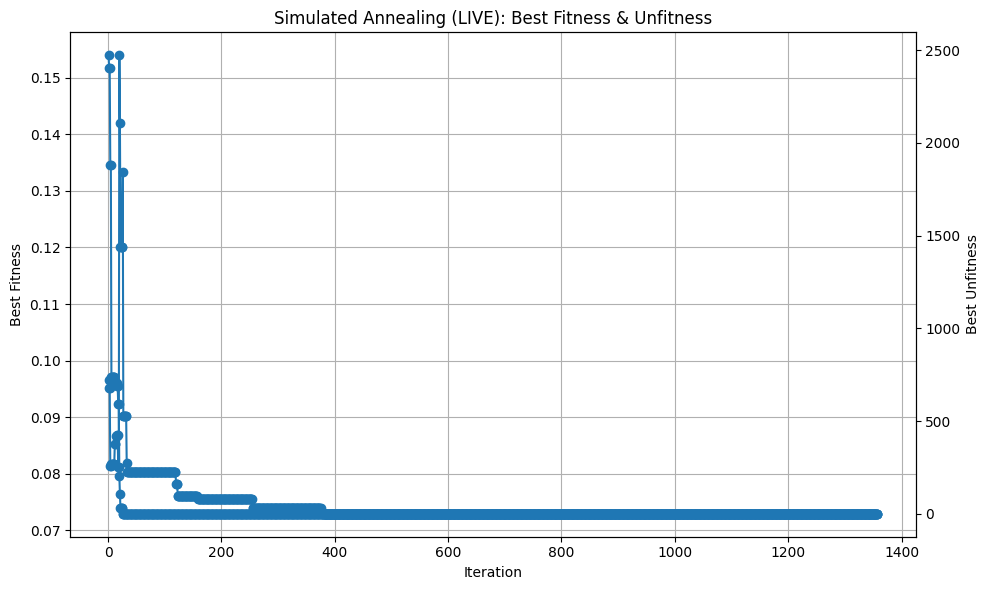

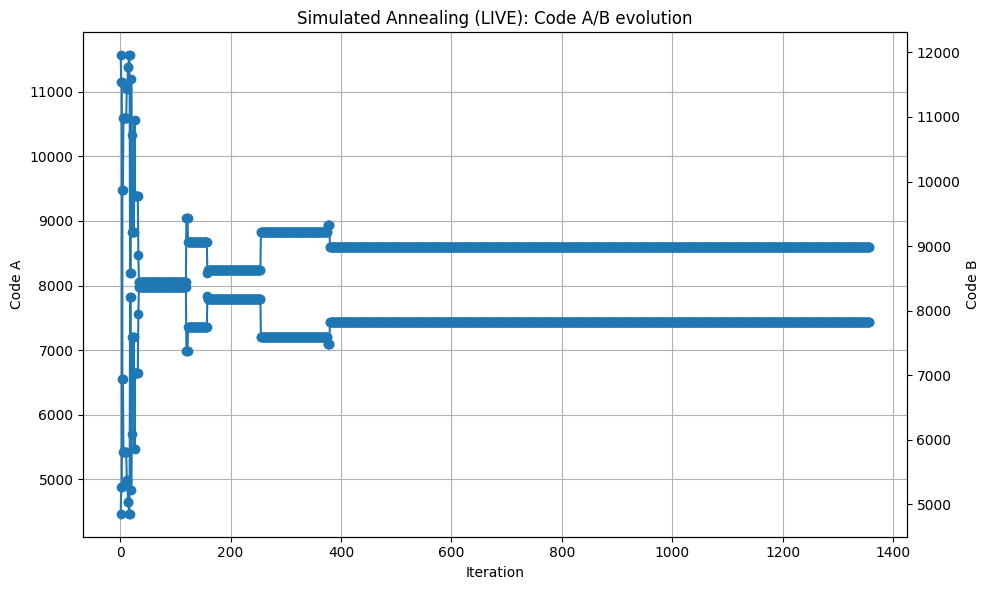

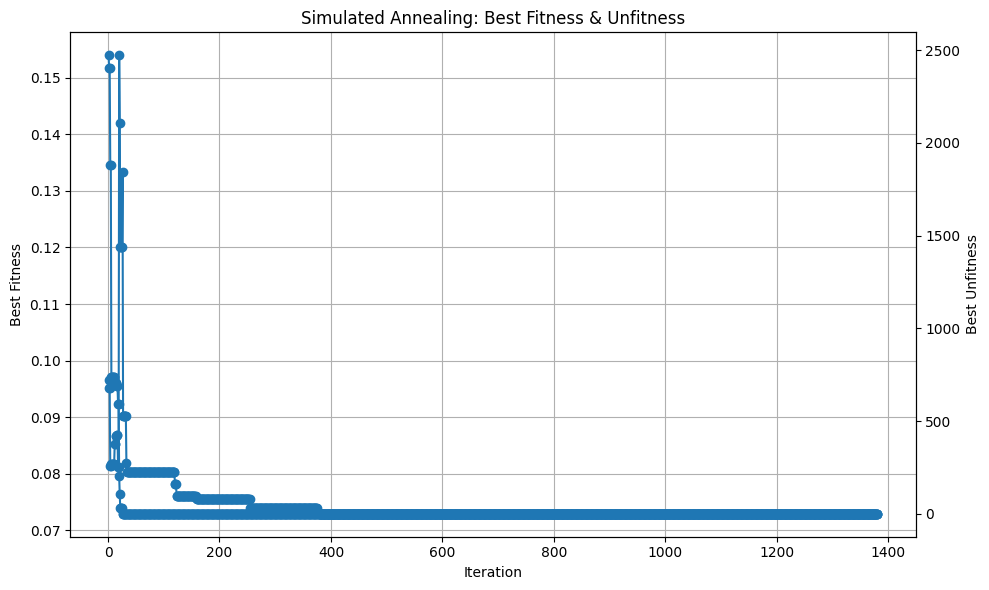

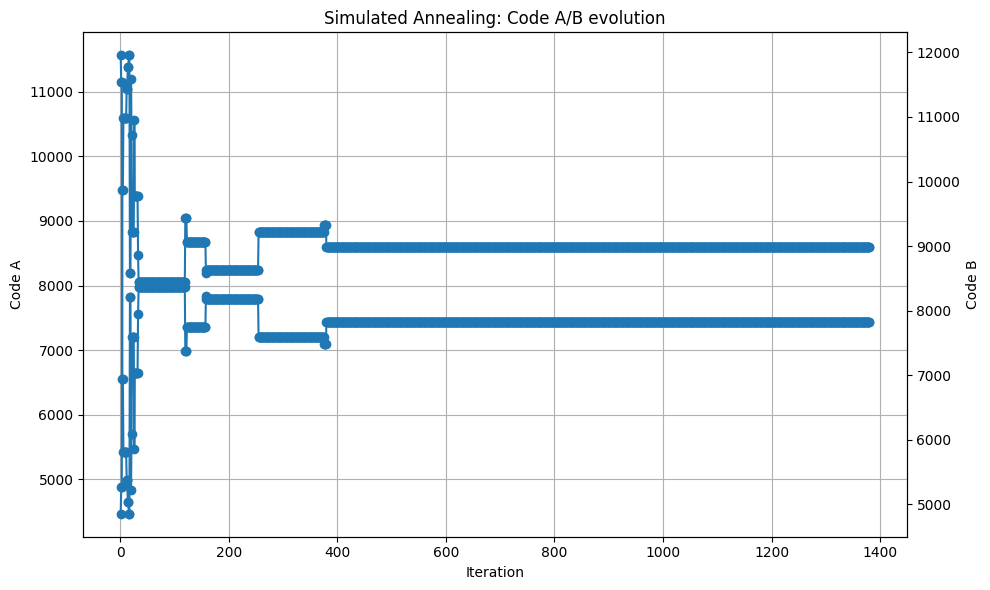

Best energy: 0.07289981667205869
Best fitness: 0.07289981667205869
Best unfitness: 0.0
Runtime (s): 6763.6091957092285


,Ecr2,WarehouseCode,Warehouse
0,Igienico Sanitari,1,B
1,Capelli,1,B
2,Viso,1,B
3,Corpo,0,A
4,Trucchi,0,A


In [139]:
best_solution, best_fitness, best_unfitness, best_energy, comp_time, history = main_sa(
            gene_space,
            num_genes,
            sol_per_pop,  # kept for compatibility; ignored in SA
            df,
            stock,
            capacity_A,
            capacity_B,
            M=1000,
            penalty_factor=1,
            T_init=1.0,
            T_min=1e-4,
            alpha=0.995,
            max_seconds=24*60*60,
            weight_unfitness=1.0,
            max_flips=2,
            seed=42,
            plot_every_seconds=60*10,   # ← set to a number (e.g., 60) to live-update plots
            live_tail=None             # ← optionally show only the last N points in live plots
)

print("Best energy:", best_energy)
print("Best fitness:", best_fitness)
print("Best unfitness:", best_unfitness)
print("Runtime (s):", comp_time)

# Final allocation mapping
unique_categories = df['Ecr2'].dropna().unique()
df_allocation = pd.DataFrame({'Ecr2': unique_categories, 'WarehouseCode': best_solution})
df_allocation['Warehouse'] = df_allocation['WarehouseCode'].replace({0: 'A', 1: 'B'})
df_allocation.head()

In [140]:
print("Global Best Individual:")
print(best_solution)
print("Global Fitness Values:")
print(best_fitness)
print("Global Unfitness Values:")
print(best_unfitness)
#print("Total Computational Time (sec):", comp_time)

Global Best Individual:
[1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1]
Global Fitness Values:
0.07289981667205869
Global Unfitness Values:
0.0


# STATISTICS

In [141]:
# Set a custom column width
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', None)  # or set a number like 1000

In [142]:
df_allocation = pd.DataFrame({'Ecr2': df['Ecr2'].dropna().unique()})
df_allocation['Warehouse'] = best_solution
df_allocation

,Ecr2,Warehouse
0,Igienico Sanitari,1
1,Capelli,1
2,Viso,1
3,Corpo,0
4,Trucchi,0
5,Cucina,0
6,Pet Care,1
7,Profumi,1
8,Giardino,0
9,Superfici,1


In [143]:
df = pd.merge(df, df_allocation, on='Ecr2', how='left')
df['Warehouse'] = df['Warehouse'].replace({0: 'A', 1: 'B'})
df

,Unnamed: 0,Num. Ordine,Mese-Giorno,Articolo,Descrizione,Pezzi ordinati,Pezzi evasi,Pz x CT,Pz x TH,Volume pezzo,Volume cartone,Ecr1,Ecr2,Ecr3,Ecr4,Canale,Cliente,PV,Percorso,Giacenza Pezzi Volume [m3],Volume evaso [m3],Warehouse
0,0,738378,04-18,20918,CAREFREE COTTON SALVASLIP 44 PZ.DISTESO,6,6,24,0,1.288000,33.96900,Cura Persona,Igienico Sanitari,Assorbenti,Salvaslip e Proteggislip,Piume Diretti,2104490,SM,26,3.474766,0.007728,B
1,1,738379,04-18,3456,STUDIO L.5 INVISI FIX GEL FOR.LIQ.150ml,6,6,6,0,0.378000,2.66000,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26,0.206955,0.002268,B
2,2,738379,04-18,7199,STUDIO L.8 FIX&FORCE GEL IPERFOR.150 ML.,6,6,6,0,0.303750,2.94400,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26,0.140424,0.001823,B
3,3,738379,04-18,43556,STUDIO L.9 INDESTRUC.GEL ESTREMO 150 ML,6,6,6,0,0.720000,2.81600,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26,0.419256,0.004320,B
4,4,738379,04-18,50045,STUDIO L.5 INVISI FIX GEL CR.FOR.VAS.150,6,6,6,0,0.405000,2.54375,Cura Persona,Capelli,Styling Capelli,Gel e Cere Capelli,Piume Diretti,2104490,SM,26,0.148149,0.002430,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298719,2447292,791134,12-29,92720,CHANTECLAIR SGRASS.600 MLx2 PZ.LIMONE,1,1,6,0,3.271125,23.04000,Casa e Bucato,Superfici,Detergenti Superfici,Sgrassatori,B2C,2152842,UD,999,2.330022,0.003271,B
2298720,2447293,791134,12-29,98819,VIM GEL BAGNO 5in1 ANTICALCARE 1000 ML,1,1,12,0,1.559250,25.63600,Casa e Bucato,Bagno,Detergenti Bagno e WC,Detergenti Bagno,B2C,2152842,UD,999,0.943970,0.001559,A
2298721,2447294,791134,12-29,105877,CIF CREMA GREEN ACTIVE 500 ML PINK BLOOM,1,1,16,0,0.728000,17.02400,Casa e Bucato,Superfici,Detergenti Superfici,Detergenti Multiuso,B2C,2152842,UD,999,0.743142,0.000728,B
2298722,2447295,791134,12-29,107171,OMINO B.DET.IDROCAPS SALVAFIBRE 20pz,1,1,8,0,2.025000,20.46000,Casa e Bucato,Bucato,Detersivi Bucato,Detersivi Capsule Lavatrice,B2C,2152842,UD,999,0.532170,0.002025,A


In [144]:
df_results = pd.DataFrame.from_dict(
    {
        'Magazzino A': [],
        'Magazzino B':[],
        
        'Codici in A':[],
        'Codici in B':[],
        
        'Stock [m3] in A':[],
        'Stock [m3] in B':[],
        
        '% Ordini completati in AB':[],
        '% Ordini completati in A':[], 
        '% Ordini completati in B':[],

        'Vol[m3] Ordini completati in A':[], 
        'Vol[m3] Ordini completati in B':[],
        'Vol[m3] Ordini completati in AB':[],
        'Vol[m3] Ordini completati in AB (A)':[],
        'Vol[m3] Ordini completati in AB (B)':[],
        
        '% Rotte completate in AB' :[],
        '% Rotte completate in A' :[],
        '% Rotte completate in B' :[],

        'Vol[m3] Rotte completati in A' :[],
        'Vol[m3] Rotte completati in B' :[],
        'Vol[m3] Rotte completati in AB' :[],
        'Vol[m3] Rotte completati in AB (A)' :[],
        'Vol[m3] Rotte completati in AB (B)' :[],

    }
)
df_results

,Magazzino A,Magazzino B,Codici in A,Codici in B,Stock [m3] in A,Stock [m3] in B,% Ordini completati in AB,% Ordini completati in A,% Ordini completati in B,Vol[m3] Ordini completati in A,Vol[m3] Ordini completati in B,Vol[m3] Ordini completati in AB,Vol[m3] Ordini completati in AB (A),Vol[m3] Ordini completati in AB (B),% Rotte completate in AB,% Rotte completate in A,% Rotte completate in B,Vol[m3] Rotte completati in A,Vol[m3] Rotte completati in B,Vol[m3] Rotte completati in AB,Vol[m3] Rotte completati in AB (A),Vol[m3] Rotte completati in AB (B)


In [145]:
assignment_A = df.groupby('Warehouse')['Ecr2'].unique().get('A', 0)
assignment_B = df.groupby('Warehouse')['Ecr2'].unique().get('B', 0)

code_A = df.groupby('Warehouse')['Articolo'].nunique().get('A', 0)
code_B = df.groupby('Warehouse')['Articolo'].nunique().get('B', 0)
# print('Article division', article_division)

#Order analysis
order_grouped_df = df.groupby(['Mese-Giorno','Num. Ordine']).agg({
    'Warehouse': lambda x: list(x.unique()),  # Stores unique warehouses as lists
    'Volume evaso [m3]': 'sum'  # Sums up volume
}).reset_index()

order_movment_A = len(order_grouped_df[order_grouped_df['Warehouse'].astype(str).str.contains(r"'A'") & ~order_grouped_df['Warehouse'].astype(str).str.contains(r"'B'")]) / len(order_grouped_df) * 100
order_movment_B = len(order_grouped_df[order_grouped_df['Warehouse'].astype(str).str.contains(r"'B'") & ~order_grouped_df['Warehouse'].astype(str).str.contains(r"'A'")]) / len(order_grouped_df) * 100
order_movment_AB = len(order_grouped_df[order_grouped_df['Warehouse'].astype(str).str.contains(r"'A'") & order_grouped_df['Warehouse'].astype(str).str.contains(r"'B'")]) / len(order_grouped_df) * 100

order_vol_A = order_grouped_df[order_grouped_df['Warehouse'].astype(str).str.contains(r"'A'") & ~order_grouped_df['Warehouse'].astype(str).str.contains(r"'B'")]['Volume evaso [m3]'].sum() 
order_vol_B = order_grouped_df[order_grouped_df['Warehouse'].astype(str).str.contains(r"'B'") & ~order_grouped_df['Warehouse'].astype(str).str.contains(r"'A'")]['Volume evaso [m3]'].sum() 
order_vol_AB = order_grouped_df[order_grouped_df['Warehouse'].astype(str).str.contains(r"'A'") & order_grouped_df['Warehouse'].astype(str).str.contains(r"'B'")]['Volume evaso [m3]'].sum()

AB_order_list = list(order_grouped_df[order_grouped_df['Warehouse'].astype(str).str.contains(r"'A'") & order_grouped_df['Warehouse'].astype(str).str.contains(r"'B'")]['Num. Ordine'])
df_AB_order_volume = df.groupby(['Num. Ordine','Warehouse'])[['Volume evaso [m3]']].sum().reset_index()
df_AB_order_volume = df_AB_order_volume[df_AB_order_volume['Num. Ordine'].isin(AB_order_list)].groupby('Warehouse')['Volume evaso [m3]'].sum()

#Route analysis
route_grouped_df = df.groupby(['Mese-Giorno','Percorso']).agg({
    'Warehouse': lambda x: list(x.unique()),  # Stores unique warehouses as lists
    'Volume evaso [m3]': 'sum'  # Sums up volume
}).reset_index()

route_movment_A = len(route_grouped_df[route_grouped_df['Warehouse'].astype(str).str.contains(r"'A'") & ~route_grouped_df['Warehouse'].astype(str).str.contains(r"'B'")]) / len(route_grouped_df) * 100
route_movment_B = len(route_grouped_df[route_grouped_df['Warehouse'].astype(str).str.contains(r"'B'") & ~route_grouped_df['Warehouse'].astype(str).str.contains(r"'A'")]) / len(route_grouped_df) * 100
route_movment_AB = len(route_grouped_df[route_grouped_df['Warehouse'].astype(str).str.contains(r"'A'") & route_grouped_df['Warehouse'].astype(str).str.contains(r"'B'")]) / len(route_grouped_df) * 100

route_vol_A = route_grouped_df[route_grouped_df['Warehouse'].astype(str).str.contains(r"'A'") & ~route_grouped_df['Warehouse'].astype(str).str.contains(r"'B'")]['Volume evaso [m3]'].sum() 
route_vol_B = route_grouped_df[route_grouped_df['Warehouse'].astype(str).str.contains(r"'B'") & ~route_grouped_df['Warehouse'].astype(str).str.contains(r"'A'")]['Volume evaso [m3]'].sum() 
route_vol_AB = route_grouped_df[route_grouped_df['Warehouse'].astype(str).str.contains(r"'A'") & route_grouped_df['Warehouse'].astype(str).str.contains(r"'B'")]['Volume evaso [m3]'].sum()

# Step 1: Extract valid routes containing both 'A' and 'B' in 'Warehouse'
AB_order_list = route_grouped_df[
    route_grouped_df['Warehouse'].astype(str).str.contains(r'A') & 
    route_grouped_df['Warehouse'].astype(str).str.contains(r'B')
][['Mese-Giorno', 'Percorso']].apply(tuple, axis=1).tolist()

# Step 2: Compute total volume for each route
df_AB_route_volume = df.groupby(['Mese-Giorno', 'Percorso', 'Warehouse'])[['Volume evaso [m3]']].sum().reset_index()

# Step 3: Filter only the relevant routes and sum by Warehouse
df_AB_route_volume = df_AB_route_volume[
    df_AB_route_volume[['Mese-Giorno', 'Percorso']].apply(tuple, axis=1).isin(AB_order_list)
].groupby('Warehouse')['Volume evaso [m3]'].sum()


weighted_stock = df.groupby(['Articolo','Warehouse',])['Giacenza Pezzi Volume [m3]'].mean() * (df.groupby(['Articolo','Warehouse',])['Pezzi evasi'].sum() / df.groupby(['Articolo'])['Pezzi evasi'].sum())
stock_A = weighted_stock.groupby('Warehouse').sum().get('A', 0)
stock_B = weighted_stock.groupby('Warehouse').sum().get('B', 0)

df_results = pd.DataFrame.from_dict(
    {
        'Magazzino A': [assignment_A],
        'Magazzino B': [assignment_B],
        
        'Codici in A':[code_A],
        'Codici in B':[code_B],
        
        'Stock [m3] in A':[stock_A],
        'Stock [m3] in B':[stock_B],
        
        '% Ordini completati in AB':[order_movment_AB],
        '% Ordini completati in A':[order_movment_A],
        '% Ordini completati in B':[order_movment_B],

        '% Rotte completate in AB':[route_movment_AB],
        '% Rotte completate in A':[route_movment_A],
        '% Rotte completate in B':[route_movment_B],

        'Vol[m3] Ordini completati in A':[order_vol_A],
        'Vol[m3] Ordini completati in B':[order_vol_B],
        'Vol[m3] Ordini completati in AB':[order_vol_AB],
        'Vol[m3] Ordini completati in AB (A)':[df_AB_order_volume.get('A', 0)],
        'Vol[m3] Ordini completati in AB (B)':[df_AB_order_volume.get('B', 0)],


        'Vol[m3] Rotte completati in A':[route_vol_A],
        'Vol[m3] Rotte completati in B':[route_vol_B],
        'Vol[m3] Rotte completati in AB':[route_vol_AB],
        'Vol[m3] Rotte completati in AB (A)' :[df_AB_route_volume.get('A', 0)],
        'Vol[m3] Rotte completati in AB (B)' :[df_AB_route_volume.get('B', 0)],

        
    }
)

In [146]:
df_results.to_excel(r'C:\Users\Matteo.Gabellini\OneDrive - Alma Mater Studiorum Università di Bologna\DOTTORATO\1.RICERCA\0.CONFERENCE PAPER\6.ICIL\1.WAREHOUSE ALLOCATION\3.RESULTS\SA_CAT2.xlsx')

In [147]:
saturazione_navetta = 0.1

df_AA = df_results.copy()
df_AA['Accettazione'] = 'A'
df_AA['Spedizione'] = 'A'
df_AA['T acc [h/gg]'] = ((df_AA['Stock [m3] in B'] + df_AA['Vol[m3] Rotte completati in AB (B)'] + df_AA['Vol[m3] Rotte completati in B'])*0.33)/(220*0.77*10*saturazione_navetta)
df_AA['T sped [h/gg]'] = ((df_AA['Vol[m3] Rotte completati in AB (B)'] + df_AA['Vol[m3] Rotte completati in B'])*0.33)/(220*0.77*10*saturazione_navetta)
df_AA['T tot [h/gg]'] = df_AA['T acc [h/gg]'] + df_AA['T sped [h/gg]']

df_ABA = df_results.copy()
df_ABA['Accettazione'] = 'A-B'
df_ABA['Spedizione'] = 'A'
df_ABA['T acc [h/gg]'] = 0
df_ABA['T sped [h/gg]'] = ((df_ABA['Vol[m3] Rotte completati in AB (B)'] + df_ABA['Vol[m3] Rotte completati in B'])*0.33)/(220*0.77*10*saturazione_navetta)
df_ABA['T tot [h/gg]'] = df_ABA['T acc [h/gg]'] + df_ABA['T sped [h/gg]']

df_AAB = df_results.copy()
df_AAB['Accettazione'] = 'A'
df_AAB['Spedizione'] = 'A-B'
df_AAB['T acc [h/gg]'] = ((df_AA['Stock [m3] in B'] + df_AAB['Vol[m3] Rotte completati in AB (B)'] + df_AAB['Vol[m3] Rotte completati in B'])*0.33)/(220*0.77*10*saturazione_navetta)
df_AAB['T sped [h/gg]'] = (df_AA['Vol[m3] Rotte completati in AB (B)']*0.33)/(220*0.77*10*saturazione_navetta)
df_AAB['T tot [h/gg]'] = df_AAB['T acc [h/gg]'] + df_AAB['T sped [h/gg]']

df_ABAB = df_results.copy()
df_ABAB['Accettazione'] = 'A-B'
df_ABAB['Spedizione'] = 'A-B'
df_ABAB['T acc [h/gg]'] = 0
df_ABAB['T sped [h/gg]'] =  (df_ABAB['Vol[m3] Rotte completati in AB (B)']*0.33)/(220*0.77*10*saturazione_navetta)
df_ABAB['T tot [h/gg]'] = df_ABAB['T acc [h/gg]'] + df_ABAB['T sped [h/gg]']

df_all_results = pd.concat([df_AA,df_ABA,df_AAB,df_ABAB])
df_all_results

,Magazzino A,Magazzino B,Codici in A,Codici in B,Stock [m3] in A,Stock [m3] in B,% Ordini completati in AB,% Ordini completati in A,% Ordini completati in B,% Rotte completate in AB,% Rotte completate in A,% Rotte completate in B,Vol[m3] Ordini completati in A,Vol[m3] Ordini completati in B,Vol[m3] Ordini completati in AB,Vol[m3] Ordini completati in AB (A),Vol[m3] Ordini completati in AB (B),Vol[m3] Rotte completati in A,Vol[m3] Rotte completati in B,Vol[m3] Rotte completati in AB,Vol[m3] Rotte completati in AB (A),Vol[m3] Rotte completati in AB (B),Accettazione,Spedizione,T acc [h/gg],T sped [h/gg],T tot [h/gg]
0,"[Corpo, Trucchi, Cucina, Giardino, Bucato, Bagno]","[Igienico Sanitari, Capelli, Viso, Pet Care, Profumi, Superfici, Baby, Stagionali, Uomo, Parafarmacia, Altro]",8595,7826,4366.596613,2473.402276,67.902383,16.107839,15.989777,92.710018,4.054783,3.235199,996.909299,857.049086,35479.108812,21977.707559,13501.401253,179.186967,67.037827,37086.842402,22795.429891,14291.412512,A,A,32.789323,27.971007,60.760330
0,"[Corpo, Trucchi, Cucina, Giardino, Bucato, Bagno]","[Igienico Sanitari, Capelli, Viso, Pet Care, Profumi, Superfici, Baby, Stagionali, Uomo, Parafarmacia, Altro]",8595,7826,4366.596613,2473.402276,67.902383,16.107839,15.989777,92.710018,4.054783,3.235199,996.909299,857.049086,35479.108812,21977.707559,13501.401253,179.186967,67.037827,37086.842402,22795.429891,14291.412512,A-B,A,0.000000,27.971007,27.971007
0,"[Corpo, Trucchi, Cucina, Giardino, Bucato, Bagno]","[Igienico Sanitari, Capelli, Viso, Pet Care, Profumi, Superfici, Baby, Stagionali, Uomo, Parafarmacia, Altro]",8595,7826,4366.596613,2473.402276,67.902383,16.107839,15.989777,92.710018,4.054783,3.235199,996.909299,857.049086,35479.108812,21977.707559,13501.401253,179.186967,67.037827,37086.842402,22795.429891,14291.412512,A,A-B,32.789323,27.840414,60.629737
0,"[Corpo, Trucchi, Cucina, Giardino, Bucato, Bagno]","[Igienico Sanitari, Capelli, Viso, Pet Care, Profumi, Superfici, Baby, Stagionali, Uomo, Parafarmacia, Altro]",8595,7826,4366.596613,2473.402276,67.902383,16.107839,15.989777,92.710018,4.054783,3.235199,996.909299,857.049086,35479.108812,21977.707559,13501.401253,179.186967,67.037827,37086.842402,22795.429891,14291.412512,A-B,A-B,0.000000,27.840414,27.840414


In [148]:
df_all_results

,Magazzino A,Magazzino B,Codici in A,Codici in B,Stock [m3] in A,Stock [m3] in B,% Ordini completati in AB,% Ordini completati in A,% Ordini completati in B,% Rotte completate in AB,% Rotte completate in A,% Rotte completate in B,Vol[m3] Ordini completati in A,Vol[m3] Ordini completati in B,Vol[m3] Ordini completati in AB,Vol[m3] Ordini completati in AB (A),Vol[m3] Ordini completati in AB (B),Vol[m3] Rotte completati in A,Vol[m3] Rotte completati in B,Vol[m3] Rotte completati in AB,Vol[m3] Rotte completati in AB (A),Vol[m3] Rotte completati in AB (B),Accettazione,Spedizione,T acc [h/gg],T sped [h/gg],T tot [h/gg]
0,"[Corpo, Trucchi, Cucina, Giardino, Bucato, Bagno]","[Igienico Sanitari, Capelli, Viso, Pet Care, Profumi, Superfici, Baby, Stagionali, Uomo, Parafarmacia, Altro]",8595,7826,4366.596613,2473.402276,67.902383,16.107839,15.989777,92.710018,4.054783,3.235199,996.909299,857.049086,35479.108812,21977.707559,13501.401253,179.186967,67.037827,37086.842402,22795.429891,14291.412512,A,A,32.789323,27.971007,60.760330
0,"[Corpo, Trucchi, Cucina, Giardino, Bucato, Bagno]","[Igienico Sanitari, Capelli, Viso, Pet Care, Profumi, Superfici, Baby, Stagionali, Uomo, Parafarmacia, Altro]",8595,7826,4366.596613,2473.402276,67.902383,16.107839,15.989777,92.710018,4.054783,3.235199,996.909299,857.049086,35479.108812,21977.707559,13501.401253,179.186967,67.037827,37086.842402,22795.429891,14291.412512,A-B,A,0.000000,27.971007,27.971007
0,"[Corpo, Trucchi, Cucina, Giardino, Bucato, Bagno]","[Igienico Sanitari, Capelli, Viso, Pet Care, Profumi, Superfici, Baby, Stagionali, Uomo, Parafarmacia, Altro]",8595,7826,4366.596613,2473.402276,67.902383,16.107839,15.989777,92.710018,4.054783,3.235199,996.909299,857.049086,35479.108812,21977.707559,13501.401253,179.186967,67.037827,37086.842402,22795.429891,14291.412512,A,A-B,32.789323,27.840414,60.629737
0,"[Corpo, Trucchi, Cucina, Giardino, Bucato, Bagno]","[Igienico Sanitari, Capelli, Viso, Pet Care, Profumi, Superfici, Baby, Stagionali, Uomo, Parafarmacia, Altro]",8595,7826,4366.596613,2473.402276,67.902383,16.107839,15.989777,92.710018,4.054783,3.235199,996.909299,857.049086,35479.108812,21977.707559,13501.401253,179.186967,67.037827,37086.842402,22795.429891,14291.412512,A-B,A-B,0.000000,27.840414,27.840414


df_all_results.to_excel(r'C:\Users\Matteo.Gabellini\OneDrive - Alma Mater Studiorum Università di Bologna\DOTTORATO\2.CONSULENZA\AZIENDE\MELONI\4.RISULTATI\0.BRUTE FORCE\Unibo.xlsx')

In [149]:
df_all_results[['Stock [m3] in A','Stock [m3] in B']].sum().sum()/4

6839.998889377758